# Autoencoder

An autoencoder consists of 3 components : encoder, code and decoder. It learns latent variables for unlabeled data.

## Prepare Dataset

In [2]:
import numpy as np
from keras.datasets import fashion_mnist

def get_dataset():
    # Load dataset
    (x_train, _), (x_test, _) = fashion_mnist.load_data()

    # Normalize data
    x_train = x_train.astype('float32')/255
    x_test = x_test.astype('float32')/255

    # Flatten images into 1D array
    # x_train.shape = (num_images, width, height) to (num_image, width*height)
    # x_test.shape = (num_images, width, height) to (num_image, width*height)
    image_shape = x_train.shape[1:]
    total_pixel = np.prod(image_shape)

    num_training = x_train.shape[0]
    num_test = x_test.shape[0]

    x_train = x_train.reshape(num_training, total_pixel)
    x_test = x_test.reshape(num_test, total_pixel)

    return x_train, x_test

x_train, x_test = get_dataset()
print('Num examples ', x_train.shape[0])

Num examples  60000


## Visualization

<Figure size 432x288 with 0 Axes>

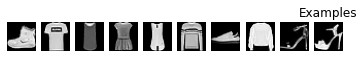

In [3]:
import matplotlib.pyplot as plt

def show_images(data, title):
    plt.gray()
    fig, ax = plt.subplots(1, 10)
    for i in range(10):
        ax[i].axis('off')
        ax[i].imshow(data[i].reshape(28, 28))
    plt.title(title)

show_images(x_train, 'Examples')

## Create Model

Create an autoencoder with the bottleneck layer containing the **latent variables** (32 in that case)

In [4]:
from keras.layers import Input, Dense
from keras.models import Model

def get_autoencoder():
    # Build the layers
    input_layer = Input(shape=(784,))
    encoded_layer = Dense(units=128, activation='relu', name='EncoderLayer1')(input_layer)
    encoded_layer = Dense(units=64, activation='relu', name='EncoderLayer2')(encoded_layer)
    encoded_layer = Dense(units=32, activation='relu', name='SampleLayer')(encoded_layer)
    decoded_layer = Dense(units=64, activation='relu', name='DecoderLayer1')(encoded_layer)
    decoded_layer = Dense(units=128, activation='relu', name='DecoderLayer2')(decoded_layer)
    decoded_layer = Dense(units=784, activation='sigmoid', name='Output')(decoded_layer)

    # Build and compile the model
    autoencoder = Model(input_layer, decoded_layer)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return autoencoder

In [5]:
model = get_autoencoder()
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
EncoderLayer1 (Dense)        (None, 128)               100480    
_________________________________________________________________
EncoderLayer2 (Dense)        (None, 64)                8256      
_________________________________________________________________
SampleLayer (Dense)          (None, 32)                2080      
_________________________________________________________________
DecoderLayer1 (Dense)        (None, 64)                2112      
_________________________________________________________________
DecoderLayer2 (Dense)        (None, 128)               8320      
_________________________________________________________________
Output (Dense)               (None, 784)              

## Training

Epoch 1/10
94/94 [==============================] - 1s 10ms/step - loss: 0.4446 - accuracy: 0.0067 - val_loss: 0.3604 - val_accuracy: 0.0046
Epoch 2/10
94/94 [==============================] - 1s 9ms/step - loss: 0.3370 - accuracy: 0.0086 - val_loss: 0.3237 - val_accuracy: 0.0095
Epoch 3/10
94/94 [==============================] - 1s 9ms/step - loss: 0.3166 - accuracy: 0.0122 - val_loss: 0.3154 - val_accuracy: 0.0143
Epoch 4/10
94/94 [==============================] - 1s 9ms/step - loss: 0.3106 - accuracy: 0.0144 - val_loss: 0.3105 - val_accuracy: 0.0143
Epoch 5/10
94/94 [==============================] - 1s 9ms/step - loss: 0.3065 - accuracy: 0.0162 - val_loss: 0.3060 - val_accuracy: 0.0129
Epoch 6/10
94/94 [==============================] - 1s 9ms/step - loss: 0.3033 - accuracy: 0.0149 - val_loss: 0.3032 - val_accuracy: 0.0134
Epoch 7/10
94/94 [==============================] - 1s 9ms/step - loss: 0.3006 - accuracy: 0.0146 - val_loss: 0.3011 - val_accuracy: 0.0143
Epoch 8/10
94/94 [=

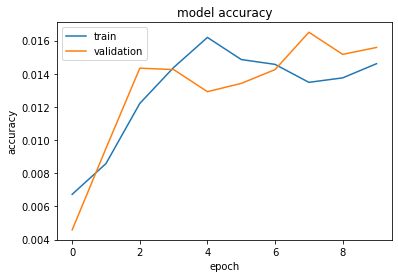

In [6]:
x_train, x_test = get_dataset()
model = get_autoencoder()

history = model.fit(x=x_train, y=x_train,
                    epochs=10,
                    batch_size=512,
                    shuffle=True,
                    verbose=1,
                    validation_split=0.2)

# plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Test Model

<Figure size 432x288 with 0 Axes>

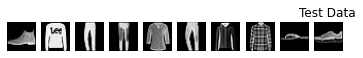

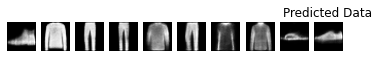

In [7]:
# Test the autoencoder
x_predicted = model.predict(x_test)

# Show results
show_images(x_test, 'Test Data')
show_images(x_predicted, 'Predicted Data')

## Resources

- Hinton, Geoffrey E., and Ruslan R. Salakhutdinov. "Reducing the dimensionality of data with neural networks." science 313, no. 5786 (2006): 504-507.
- Vincent, Pascal, Hugo Larochelle, Yoshua Bengio, and Pierre-Antoine Manzagol. "Extracting and composing robust features with denoising autoencoders." In Proceedings of the 25th international conference on Machine learning, pp. 1096-1103. ACM, 2008. 